# An NLP-powered exploration of financial tweets



In [171]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, date

In [136]:
data = pd.read_csv('data/stockerbot-export.csv', sep=',', error_bad_lines=False, parse_dates=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data

b'Skipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...
28263,1019730088617635800,$FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,Wed Jul 18 23:46:13 +0000 2018,test5f1798,FB,Facebook,NaN,False
28264,1019730115524288500,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,Wed Jul 18 23:46:19 +0000 2018,keizai_toushi17,BTC,Bitcoin,http://keizai-toushi-navi.com/?p=26838,False
28265,1019730115805184000,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,Wed Jul 18 23:46:19 +0000 2018,iad81,BTC,Bitcoin,https://twitter.com/CRYPTOVERLOAD/status/10178...,False
28266,1019730117252341800,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,Wed Jul 18 23:46:20 +0000 2018,O8viWMyrCV6cBOZ,BTC,Bitcoin,http://true.velvet.jp/monexx/archives/2357,False


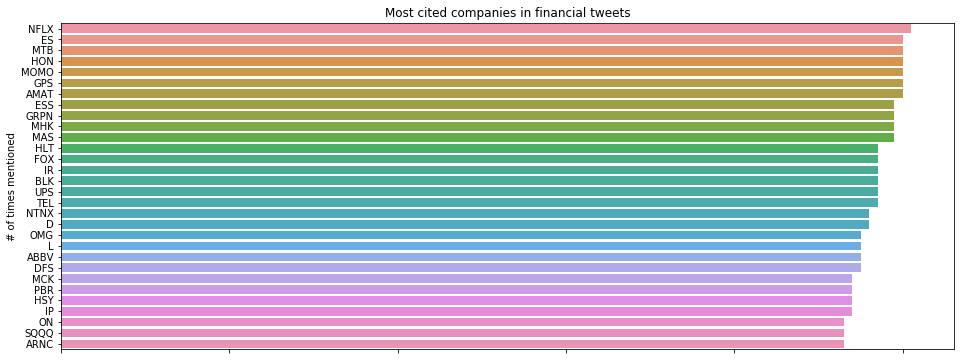

In [180]:
# Top 10 most cited companies

top_cited_companies = data.groupby('symbols').count().sort_values(by='id', ascending=False).reset_index()

def bar_plot(data, x, y, xlabel=None, ylabel="occurences", title=None):
    fig = plt.figure(figsize=(16, 6))
    chart = sns.barplot(data=data, y=y, x=x)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


bar_plot(data=top_cited_companies.iloc[0:30], x='id', y='symbols', 
         ylabel='# of times mentioned', title='Most cited companies in financial tweets')

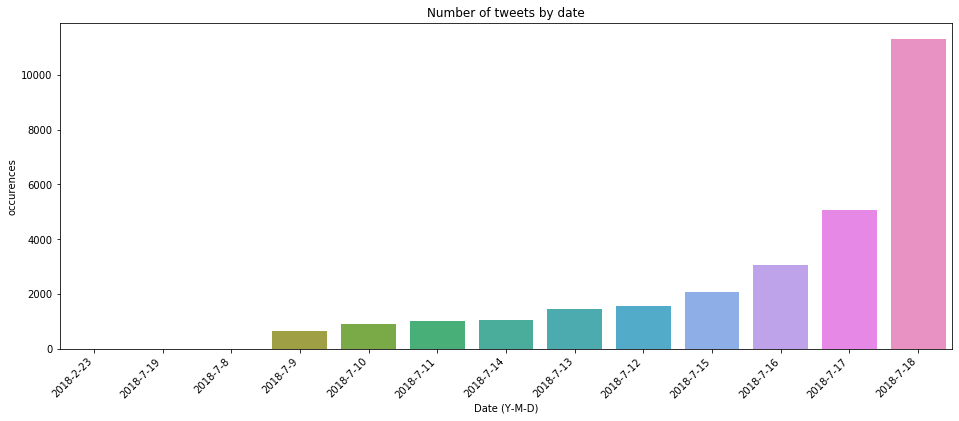

In [142]:
data['y-m-d'] = data['timestamp'].apply(lambda x: '{}-{}-{}'.format(x.year, x.month, x.day))
time_data = data.groupby('y-m-d').count().sort_values(by='timestamp').reset_index()

bar_plot(data=time_data, x='y-m-d', y='id', 
         xlabel="Date (Y-M-D)", title='Number of tweets by date')

We will filter the values to keep only
- companies highly mentionned (>50)
- continuous timeframe (2019-7-9 until 2018-7-18)

In [196]:
data_filtered = data[data['timestamp'].apply(lambda x: x.date()) >= date(2018,7,9)]
highly_mentionned_companies = list(top_cited_companies[top_cited_companies['id'] >= 50]['symbols'])
data_filtered = data_filtered[data_filtered['symbols'].apply(lambda x: x in highly_mentionned_companies)].reset_index()
data_filtered

,index,id,text,timestamp,source,symbols,company_names,url,verified,y-m-d
0,3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,2018-07-18 22:52:52+00:00,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,2018-7-18
1,6,1019720209786114000,Don’t miss my convo with one of my favorite th...,2018-07-18 23:06:58+00:00,ianbremmer,HRS,Harris,https://twitter.com/samharrisorg/status/101971...,True,2018-7-18
2,8,1019720723441635300,Senate wants emergency alerts to go out throug...,2018-07-18 23:09:00+00:00,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True,2018-7-18
3,9,1019721145396887600,Hedge fund manager Marc Larsy says bitcoin $40...,2018-07-18 23:10:41+00:00,MarketWatch,BTC,Bitcoin,https://on.mktw.net/2Ntr7k9,True,2018-7-18
4,11,1019723744804245500,Roger Federer's Uniqlo deal makes him one of t...,2018-07-18 23:21:00+00:00,Forbes,ENDP,Endo,https://twitter.com/i/web/status/1019723744804...,True,2018-7-18
...,...,...,...,...,...,...,...,...,...,...
24369,28263,1019730088617635800,$FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,2018-07-18 23:46:13+00:00,test5f1798,FB,Facebook,NaN,False,2018-7-18
24370,28264,1019730115524288500,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,2018-07-18 23:46:19+00:00,keizai_toushi17,BTC,Bitcoin,http://keizai-toushi-navi.com/?p=26838,False,2018-7-18
24371,28265,1019730115805184000,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,2018-07-18 23:46:19+00:00,iad81,BTC,Bitcoin,https://twitter.com/CRYPTOVERLOAD/status/10178...,False,2018-7-18
24372,28266,1019730117252341800,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,2018-07-18 23:46:20+00:00,O8viWMyrCV6cBOZ,BTC,Bitcoin,http://true.velvet.jp/monexx/archives/2357,False,2018-7-18


## Vectorization

In [254]:
import re
import string

In [284]:
def remove_punctuation(txt):
    """Returns the string txt without punctuation."""
    return txt.translate(str.maketrans('', '', string.punctuation.replace("'", "") + "’·➡️\“”")) 

def preprocess_txt(txt):
    #Remove links
    link_regex = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
    txt = re.sub(link_regex, r'', txt)
    txt = txt.replace("’", "'")
    #Remove punctuation
    txt = remove_punctuation(txt)
    txt = txt.lower()
    return txt


In [285]:
# Frequent tokens

tokens_frequency = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(data_filtered['text'].apply(preprocess_txt))))

In [289]:
df_tokens_frequency = pd.DataFrame.from_dict(tokens_frequency, orient='index').reset_index()
df_tokens_frequency.rename({'index': 'token', 0: 'count'}, axis=1, inplace=True)
df_tokens_frequency = df_tokens_frequency[df_tokens_frequency['token'].apply(lambda x: x not in nltk.corpus.stopwords.words('english'))]
df_tokens_frequency.sort_values(by='count', ascending=False).head()

,token,count
170,rt,4176
534,inc,3396
276,amp,2278
51,'s,1773
290,stock,1604


In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

freq = TfidfVectorizer(preprocessor=preprocess_txt,
                       stop_words=nltk.corpus.stopwords.words('english'),
                      min_df=2)

X = freq.fit_transform(data_filtered['text'])

In [313]:
from sklearn.decomposition import TruncatedSVD, PCA

pca = TruncatedSVD(n_components=500)
X_pca = pca.fit_transform(X)

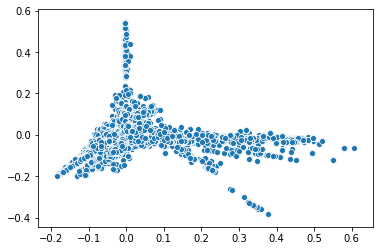

In [318]:
X_pca_2 = PCA().fit_transform(X_pca)

sns.scatterplot(X_pca_2[:,0], X_pca_2[:,1])

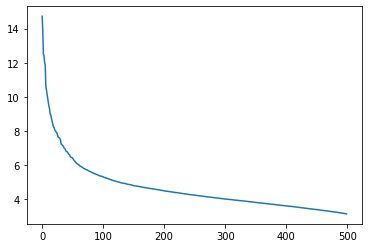

In [319]:
sns.lineplot(data=pca.singular_values_)

In [322]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X_pca_2[:,0:2])

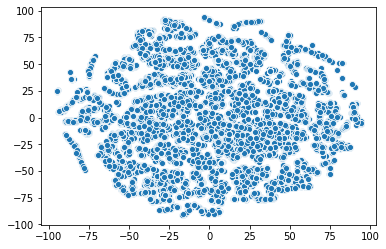

In [323]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1])

NameError: name 'X_tsne' is not defined